In [1]:
#!pip install scikit-image
#!pip install matplotlib
#!pip install opencv-python

# Import the necessary packages

from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.transform import resize
from skimage import io
import matplotlib.pyplot as plt

import numpy as np


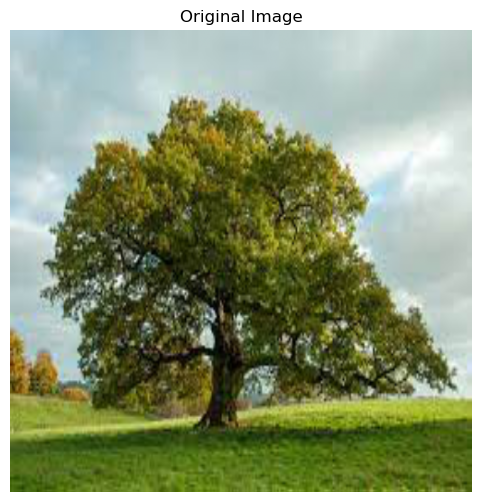

In [2]:
from skimage.transform import resize

# Load the image
image_path = "image_segmentation_images/test1.jpg"
image = img_as_float(io.imread(image_path))

# Resize the image to a specific size (e.g., 512x512)
target_size = (512, 512)
image_resized = resize(image, target_size, anti_aliasing=True)

# Create a figure with a single subplot for the original image
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the original image
ax.imshow(image_resized)
ax.set_title('Original Image')
ax.axis('off')

plt.show()  # Display the plot inline within the notebook


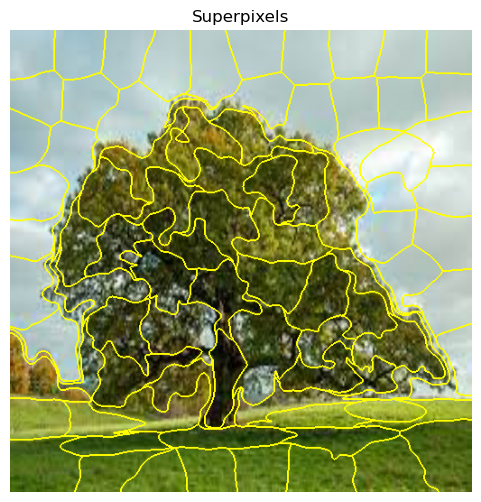

In [3]:
# Apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(image_resized, n_segments=100, sigma=5)
    
# Show the output of SLIC segmentation
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(image_resized, segments))
plt.title('Superpixels')
plt.axis('off')
plt.show()  # Display the plot inline within the notebook

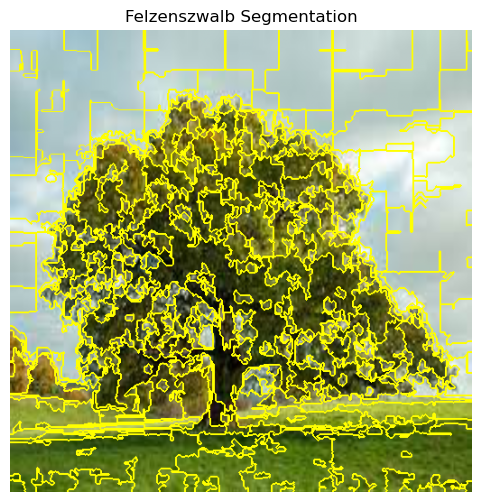

In [4]:
from skimage.segmentation import felzenszwalb

# Apply Felzenszwalb segmentation
segments_felzenszwalb = felzenszwalb(image_resized, scale=100, sigma=0.5, min_size=50)

# Show the output of Felzenszwalb segmentation
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(image_resized, segments_felzenszwalb))
plt.title('Felzenszwalb Segmentation')
plt.axis('off')
plt.show()  # Display the plot inline within the notebook



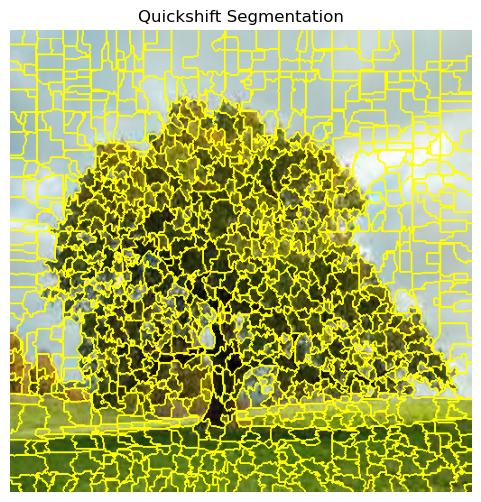

In [5]:
from skimage.segmentation import quickshift

# Apply Quickshift segmentation
segments_quickshift = quickshift(image_resized, kernel_size=3, max_dist=6, ratio=0.5)

# Show the output of Quickshift segmentation
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(image_resized, segments_quickshift))
plt.title('Quickshift Segmentation')
plt.axis('off')
plt.show()  # Display the plot inline within the notebook


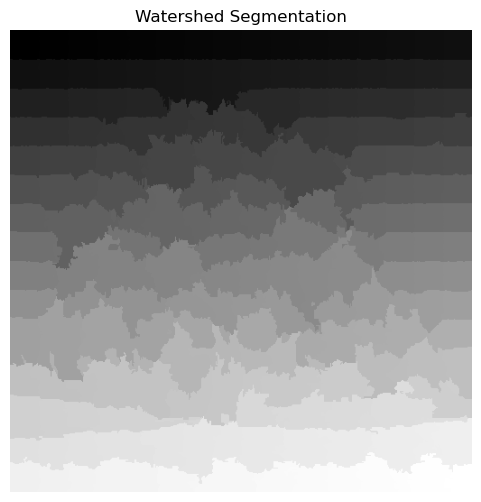

In [6]:
from skimage.segmentation import watershed
from skimage.filters import sobel
from skimage.color import rgb2gray

# Convert the image to grayscale for Watershed segmentation
image_gray = rgb2gray(image_resized)

# Compute gradient magnitude using Sobel filter
gradient = sobel(image_gray)

# Apply Watershed segmentation
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

# Show the output of Watershed segmentation
plt.figure(figsize=(6, 6))
plt.imshow(segments_watershed, cmap='gray')
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()  # Display the plot inline within the notebook


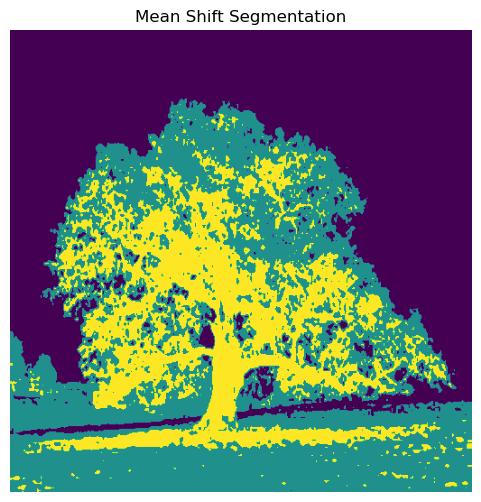

In [10]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Convert image to 1D array
flat_image = image_resized.reshape((-1, 3))

# Estimate bandwidth for mean shift
bandwidth = estimate_bandwidth(flat_image, quantile=0.1, n_samples=100)

# Perform mean shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(flat_image)

# Reshape the labels to match the original image shape
labels_mean_shift = ms.labels_.reshape(image_resized.shape[:2])

# Show the output of Mean Shift Segmentation
plt.figure(figsize=(6, 6))
plt.imshow(labels_mean_shift)
plt.title('Mean Shift Segmentation')
plt.axis('off')
plt.show()
